TASK 1: Importing Dataset into PostgreSQL & MongoDB with Vertical-Based Tables/Collections

In [1]:
#Reading the data
import pandas as pd
df = pd.read_csv("Dataset_1.csv")
df.head()

,node_id,type,name,latitude,longitude,created_at,value 1,value 2,value 3,value 4,value 5,value 6,value 7,value 8,value 9,value 10,value 11,value 12
0,sl051,AQ,Node sl051,13.017933,77.555378,52:44.1,12.231861,41.860344,NaN,174.722133,NaN,26.590544,31.772929,26.368710,3.490259,6.937300,24.732230,31.339453
1,wf030,SL,Node wf030,12.985701,77.659210,14:45.1,15.729319,69.414902,-0.991364,106.240761,NaN,78.301568,24.112349,28.095163,41.047575,41.616871,34.944792,NaN
2,aq036,WF,Node aq036,12.968674,77.646228,05:20.1,0.167878,0.310233,1.870961,74.553437,1.532171,0.682208,NaN,NaN,NaN,NaN,NaN,NaN
3,wf048,WF,Node wf048,13.020752,77.560964,09:41.1,0.544607,0.057603,1.973522,43.623925,0.109130,0.019358,NaN,NaN,NaN,NaN,NaN,NaN
4,aq037,AQ,Node aq037,12.951537,77.604078,50:57.1,4.737986,5.820494,6.553738,180.158180,15.087324,31.855556,5.234277,42.704157,16.621897,2.290797,8.087435,3.384203


In [2]:
#verification of data
print("Shape:",df.shape)
print("Columns:",df.columns)
print("Missing values:\n", df.isnull().sum())
print("Unique verticals:", df['type'].unique())
df.head()

Shape: (10000, 18)
Columns: Index(['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at',
       'value 1', 'value 2', 'value 3', 'value 4', 'value 5', 'value 6',
       'value 7', 'value 8', 'value 9', 'value 10', 'value 11', 'value 12'],
      dtype='object')
Missing values:
 node_id          0
type             0
name             0
latitude         0
longitude        0
created_at       0
value 1        399
value 2        499
value 3        598
value 4        698
value 5        299
value 6        399
value 7       3354
value 8       3423
value 9       3493
value 10      3214
value 11      3284
value 12      5647
dtype: int64
Unique verticals: ['AQ' 'SL' 'WF']


,node_id,type,name,latitude,longitude,created_at,value 1,value 2,value 3,value 4,value 5,value 6,value 7,value 8,value 9,value 10,value 11,value 12
0,sl051,AQ,Node sl051,13.017933,77.555378,52:44.1,12.231861,41.860344,NaN,174.722133,NaN,26.590544,31.772929,26.368710,3.490259,6.937300,24.732230,31.339453
1,wf030,SL,Node wf030,12.985701,77.659210,14:45.1,15.729319,69.414902,-0.991364,106.240761,NaN,78.301568,24.112349,28.095163,41.047575,41.616871,34.944792,NaN
2,aq036,WF,Node aq036,12.968674,77.646228,05:20.1,0.167878,0.310233,1.870961,74.553437,1.532171,0.682208,NaN,NaN,NaN,NaN,NaN,NaN
3,wf048,WF,Node wf048,13.020752,77.560964,09:41.1,0.544607,0.057603,1.973522,43.623925,0.109130,0.019358,NaN,NaN,NaN,NaN,NaN,NaN
4,aq037,AQ,Node aq037,12.951537,77.604078,50:57.1,4.737986,5.820494,6.553738,180.158180,15.087324,31.855556,5.234277,42.704157,16.621897,2.290797,8.087435,3.384203


In [3]:
#Filling the missing values to 0(Data cleaning)
df = df.fillna(0)
# convertion of float to numeric 
value_cols = [f"value {i}" for i in range(1, 13)]
df[value_cols] = df[value_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df.head()


,node_id,type,name,latitude,longitude,created_at,value 1,value 2,value 3,value 4,value 5,value 6,value 7,value 8,value 9,value 10,value 11,value 12
0,sl051,AQ,Node sl051,13.017933,77.555378,52:44.1,12.231861,41.860344,0.000000,174.722133,0.000000,26.590544,31.772929,26.368710,3.490259,6.937300,24.732230,31.339453
1,wf030,SL,Node wf030,12.985701,77.659210,14:45.1,15.729319,69.414902,-0.991364,106.240761,0.000000,78.301568,24.112349,28.095163,41.047575,41.616871,34.944792,0.000000
2,aq036,WF,Node aq036,12.968674,77.646228,05:20.1,0.167878,0.310233,1.870961,74.553437,1.532171,0.682208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,wf048,WF,Node wf048,13.020752,77.560964,09:41.1,0.544607,0.057603,1.973522,43.623925,0.109130,0.019358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,aq037,AQ,Node aq037,12.951537,77.604078,50:57.1,4.737986,5.820494,6.553738,180.158180,15.087324,31.855556,5.234277,42.704157,16.621897,2.290797,8.087435,3.384203


In [4]:
#Removing of duplicates
df=df.drop_duplicates()
df.head()

,node_id,type,name,latitude,longitude,created_at,value 1,value 2,value 3,value 4,value 5,value 6,value 7,value 8,value 9,value 10,value 11,value 12
0,sl051,AQ,Node sl051,13.017933,77.555378,52:44.1,12.231861,41.860344,0.000000,174.722133,0.000000,26.590544,31.772929,26.368710,3.490259,6.937300,24.732230,31.339453
1,wf030,SL,Node wf030,12.985701,77.659210,14:45.1,15.729319,69.414902,-0.991364,106.240761,0.000000,78.301568,24.112349,28.095163,41.047575,41.616871,34.944792,0.000000
2,aq036,WF,Node aq036,12.968674,77.646228,05:20.1,0.167878,0.310233,1.870961,74.553437,1.532171,0.682208,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,wf048,WF,Node wf048,13.020752,77.560964,09:41.1,0.544607,0.057603,1.973522,43.623925,0.109130,0.019358,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,aq037,AQ,Node aq037,12.951537,77.604078,50:57.1,4.737986,5.820494,6.553738,180.158180,15.087324,31.855556,5.234277,42.704157,16.621897,2.290797,8.087435,3.384203


In [5]:
#Separation of verticals
verticals = df['type'].unique()
parameters = {}
for v in verticals:
    parameters[v] = df[df['type'] == v ]
    print(f"{v} shape:", parameters[v].shape)


AQ shape: (4582, 18)
SL shape: (2413, 18)
WF shape: (3005, 18)


In [6]:
#connecting the dataset to PostgreSQL
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    database="Task1_IOT_project",
    user="postgres",
    password="Varshashri@1",
    port="5432"
)
cur = conn.cursor()
print("Connected to PostgreSQL")

Connected to PostgreSQL


In [7]:
#connecting the dataset to MongoDB
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017")
db = client["Task1_project"]
print("Connected to MongoDB")

Connected to MongoDB


In [8]:
print(parameters.keys())

dict_keys(['AQ', 'SL', 'WF'])


In [9]:
#creation of tables in postgresql
for v in parameters.keys():
    parameters[v].columns = parameters[v].columns.str.replace(' ','_')
    parameters[v].columns = parameters[v].columns.str.lower()
for v, df_v in parameters.items():
    table_name = v.lower()
#setting the datatypes
    col_defs = []
    for col in df_v.columns:
        dtype=df_v[col].dtype
        if dtype == 'int64':
            col_type = 'INT'
        elif dtype == 'float64':
            col_type = 'FLOAT'
        else:
            col_type = 'TEXT'
        col_defs.append(f'"{col}" {col_type}')
    col_defs.append('PRIMARY KEY (node_id, created_at)')

    creation_of_table_query = f"""
    CREATE TABLE IF NOT EXISTS {table_name}(
    {', '.join(col_defs)}
    );
    """

    cur.execute(creation_of_table_query)
    conn.commit()
    print(f"Table '{table_name}' created successfully!!")


Table 'aq' created successfully!!
Table 'sl' created successfully!!
Table 'wf' created successfully!!


In [10]:
cur.execute("TRUNCATE TABLE aq, sl, wf RESTART IDENTITY;")
conn.commit()
print(" aq, sl, wf truncated and identities restarted.")


 aq, sl, wf truncated and identities restarted.


In [11]:
df = df.drop_duplicates(subset=['node_id', 'created_at'], keep='first')


In [12]:
#Insertion of the data into postgreSQL tables
for table_name, df_v  in parameters.items():
    for _, row in df_v.iterrows():
        columns = ', '.join(df_v.columns)
        vals= ', '.join(['%s'] * len(df_v.columns))
        #insertion query
        insertion_of_query = f'INSERT INTO {table_name.lower()} ({columns}) VALUES ({vals}) ON CONFLICT (node_id, created_at) DO NOTHING'
        
        cur.execute(insertion_of_query, tuple(row))
    conn.commit()
    print(f"Data inserted into '{table_name}' table!!")

Data inserted into 'AQ' table!!
Data inserted into 'SL' table!!
Data inserted into 'WF' table!!


In [13]:
#Creating collections & insertion of data into MongoDB
for v, df_v in parameters.items():
    collection = db[v.lower()]
    records = df_v.to_dict(orient="records")
    collection.insert_many(records)
    print(f"Inserted data into '{v} collection successfully!!")
   

Inserted data into 'AQ collection successfully!!
Inserted data into 'SL collection successfully!!
Inserted data into 'WF collection successfully!!


TASK 2: Building Machine Learning Models for Each Vertical

In [14]:
#importing the libraries required to build the MLModel
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

#Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0),
    "Support Vector Regressor": SVR()
}


In [15]:
#Loading a copy of each verticle into ML Model
data_aq = parameters['AQ'].copy()
data_wf = parameters['WF'].copy()
data_sl = parameters['SL'].copy()

In [16]:
#The mappings of dataset 
value_mappings = {
    'value_1': {'AQ': 'pm25', 'WF': 'flowrate', 'SL': 'active_power'},
    'value_2': {'AQ': 'calibrated_pm25', 'WF': 'total_flow', 'SL': 'voltage_rs'},
    'value_3': {'AQ': 'pm10', 'WF': 'pressure', 'SL': 'frequency'},
    'value_4': {'AQ': 'calibrated_pm10', 'WF': 'pressure_voltage', 'SL': 'power_factor'},
    'value_5': {'AQ': 'temperature', 'WF': 'flow_volume', 'SL': 'pf_avg'},
    'value_6': {'AQ': 'calibrated_temperature', 'WF': 'flow_time', 'SL': 'pv1_power'},
    'value_7': {'AQ': 'relative_humidity', 'WF': '', 'SL': 'pv2_power'},
    'value_8': {'AQ': 'calibrated_relative_humidity', 'WF': '', 'SL': 'pv3_power'},
    'value_9': {'AQ': 'noise', 'WF': '', 'SL': 'r_active_power'},
    'value_10': {'AQ': 'calibrated_noise', 'WF': '', 'SL': 'y_active_power'},
    'value_11': {'AQ': 'aqi', 'WF': '', 'SL': 'b_active_power'},
    'value_12': {'AQ': 'aql', 'WF': '', 'SL': ''}
}


In [17]:
#Renaming the data of vertical columns into sub columns 
def rename_columns(df, vertical):
    rename_map = {}
    for val_col, mapping in value_mappings.items():
        if mapping[vertical]:
            rename_map[val_col] = mapping[vertical]
    return df.rename(columns=rename_map)

data_aq = rename_columns(data_aq, 'AQ')
data_wf = rename_columns(data_wf, 'WF')
data_sl = rename_columns(data_sl, 'SL')


In [18]:
#verifiction of the newly made columns
print("Columns in AQ:", data_aq.columns.tolist())
print("Columns in WF:", data_wf.columns.tolist())
print("Columns in SL:", data_sl.columns.tolist())


Columns in AQ: ['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at', 'pm25', 'calibrated_pm25', 'pm10', 'calibrated_pm10', 'temperature', 'calibrated_temperature', 'relative_humidity', 'calibrated_relative_humidity', 'noise', 'calibrated_noise', 'aqi', 'aql']
Columns in WF: ['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at', 'flowrate', 'total_flow', 'pressure', 'pressure_voltage', 'flow_volume', 'flow_time', 'value_7', 'value_8', 'value_9', 'value_10', 'value_11', 'value_12']
Columns in SL: ['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at', 'active_power', 'voltage_rs', 'frequency', 'power_factor', 'pf_avg', 'pv1_power', 'pv2_power', 'pv3_power', 'r_active_power', 'y_active_power', 'b_active_power', 'value_12']


In [19]:
#creating the target values for verticles to train the data
target_value = {
    'AQ': 'calibrated_pm25',
    'WF': 'flowrate',
    'SL': 'active_power'
}

In [22]:
#Training of the data
results = {}

for v, df in [('AQ', data_aq), ('WF', data_wf), ('SL', data_sl)]:
    print(f"\n{'='*60}")
    print(f"Training Models for {v} Vertical")
    print(f"{'='*60}")

    target = target_value[v]

    if target not in df.columns:
        print(f"Target column '{target}' not found in {v}. Skipping..")
        continue
#dropping the values which have missing target values
    drop_cols = ['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns])

    df = df.fillna(df.mean())

    X = df.drop(columns=[target])
    y = df[target]
#applying the data cleaning to the X & y train and test data
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    y = pd.to_numeric(y, errors='coerce').fillna(0)

#Splitting the data into training and testing data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#creating a dictionary for result of
    results[v] = {}
#Building a loop for evaluating the data accoring to the metics
    for name, model in models.items():

        model.fit(X_train, y_train)

        y_prediction = model.predict(X_test)

        r2 = r2_score(y_test, y_prediction)
        mse = np.sqrt(mean_squared_error(y_test, y_prediction))
        mae = mean_absolute_error(y_test, y_prediction)

        results[v][name] = {
            "R2 Score": round(r2, 4),
            "MSE": round(mse, 4),
            "MAE": round(mae, 4) 
        }
        print(f"{name}: R2={r2:.3f} | MSE={mse:.3f} | MAE={mae:.3f}")


Training Models for AQ Vertical
Linear Regression: R2=0.089 | MSE=38325.934 | MAE=2688.705
Random Forest: R2=0.094 | MSE=38219.826 | MAE=2167.422
XGBoost: R2=0.093 | MSE=38232.543 | MAE=2228.022
Support Vector Regressor: R2=-0.003 | MSE=40222.003 | MAE=2329.163

Training Models for WF Vertical
Linear Regression: R2=-95.363 | MSE=1005.418 | MAE=84.485
Random Forest: R2=-7.856 | MSE=304.797 | MAE=32.512
XGBoost: R2=-11.239 | MSE=358.311 | MAE=35.285
Support Vector Regressor: R2=-0.009 | MSE=102.880 | MAE=9.957

Training Models for SL Vertical
Linear Regression: R2=0.417 | MSE=5867.506 | MAE=510.001
Random Forest: R2=-2.332 | MSE=14020.901 | MAE=985.097
XGBoost: R2=-1.237 | MSE=11489.569 | MAE=801.036
Support Vector Regressor: R2=-0.003 | MSE=7692.237 | MAE=429.010




 Scatter Plots for AQ Vertical


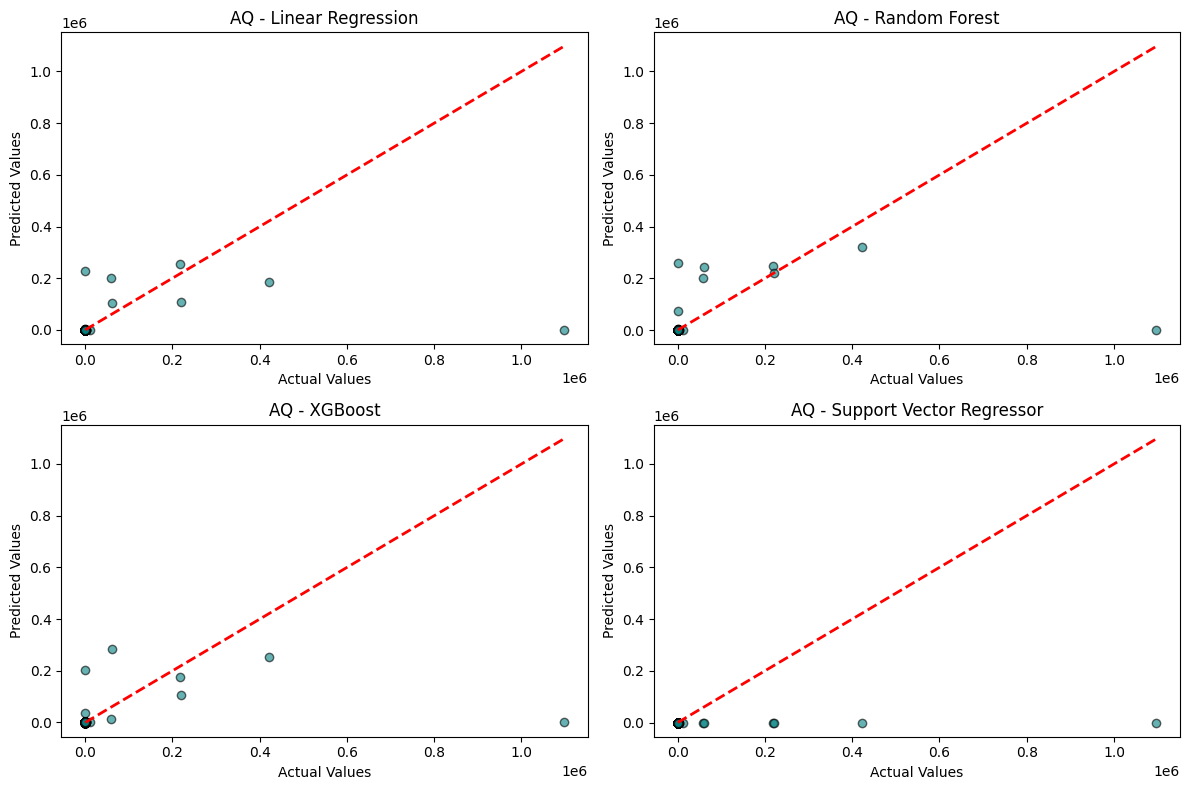



 Scatter Plots for WF Vertical


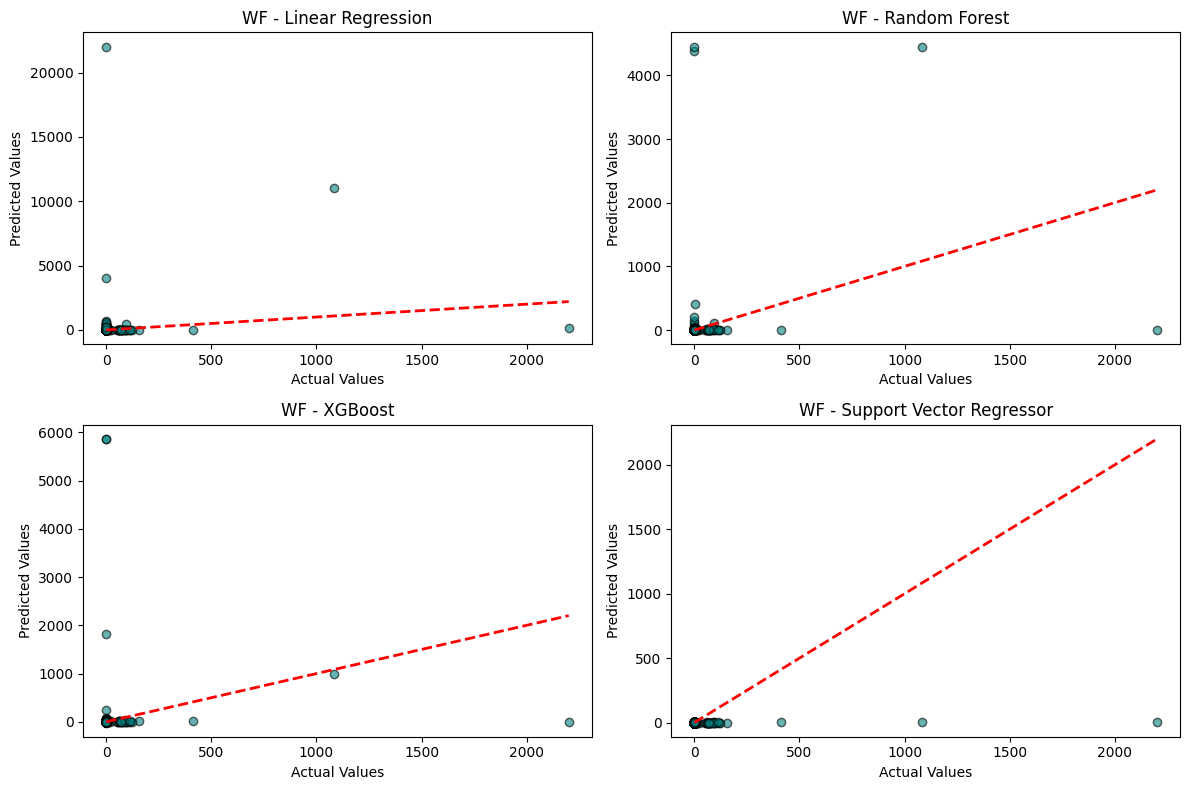



 Scatter Plots for SL Vertical


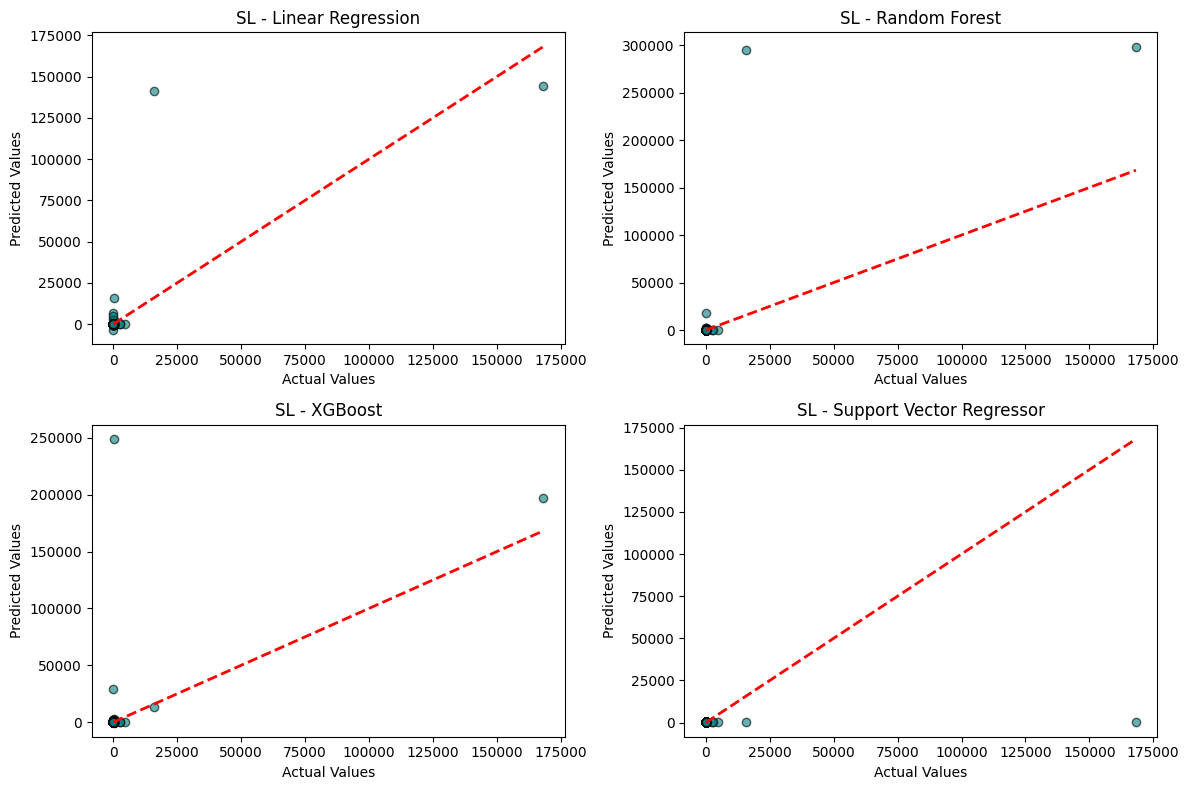

In [ ]:
# Scatter Plots for Model Evaluation

import matplotlib.pyplot as plt

for v, df in [('AQ', data_aq), ('WF', data_wf), ('SL', data_sl)]:
    target = target_value[v]
    if target not in df.columns:
        continue

    drop_cols = ['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns])
    df = df.fillna(df.mean())

    X = df.drop(columns=[target])
    y = df[target]
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    y = pd.to_numeric(y, errors='coerce').fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f"\n\n Scatter Plots for {v} Vertical")

    plt.figure(figsize=(12, 8))
    for i, (name, model) in enumerate(models.items()):
        # Predictions
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Scatter plot
        plt.subplot(2, 2, i + 1)
        plt.scatter(y_test, y_pred, alpha=0.6, color='teal', edgecolors='k')
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
        plt.title(f"{v} - {name}")
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")

    plt.tight_layout()
    plt.show()


 TASK 3: Model Improvement and Evaluation


Training Improved Models for AQ Vertical
Linear Regression: R2=0.041 | RMSE=29214.718 | MAE=1920.022
Random Forest: R2=0.269 | RMSE=25506.828 | MAE=1202.781
XGBoost: R2=0.879 | RMSE=10373.169 | MAE=724.253
Support Vector Regressor: R2=-0.002 | RMSE=29869.962 | MAE=1406.856

Training Improved Models for WF Vertical
Linear Regression: R2=-0.352 | RMSE=105.112 | MAE=14.802
Random Forest: R2=-1.541 | RMSE=144.078 | MAE=15.173
XGBoost: R2=0.395 | RMSE=70.281 | MAE=10.097
Support Vector Regressor: R2=-0.008 | RMSE=90.726 | MAE=8.131

Training Improved Models for SL Vertical
Linear Regression: R2=0.511 | RMSE=13165.455 | MAE=897.736
Random Forest: R2=0.878 | RMSE=6567.799 | MAE=446.868
XGBoost: R2=0.077 | RMSE=18075.854 | MAE=1681.049
Support Vector Regressor: R2=-0.003 | RMSE=18849.221 | MAE=1087.078


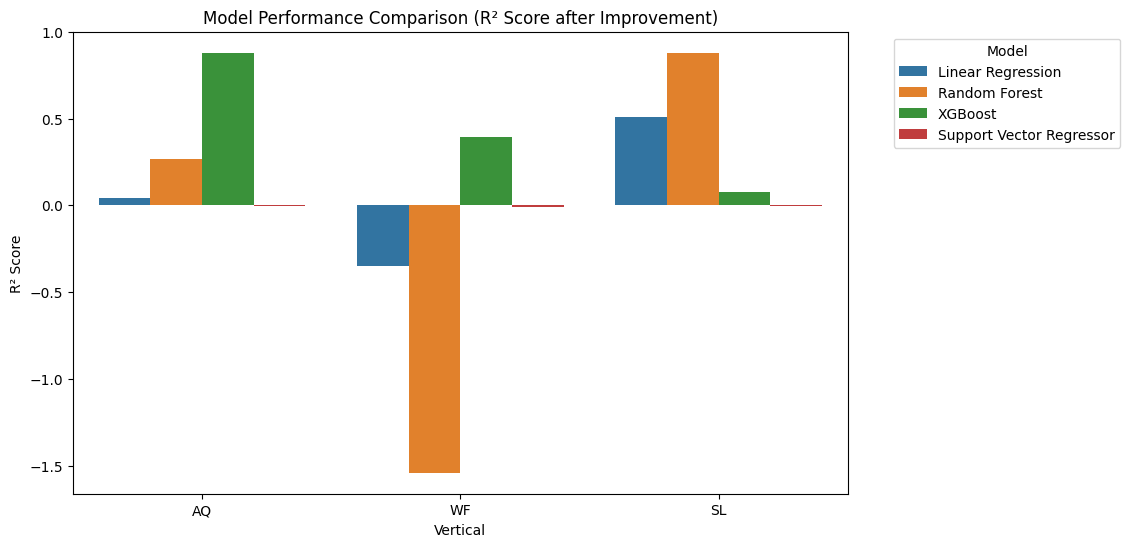

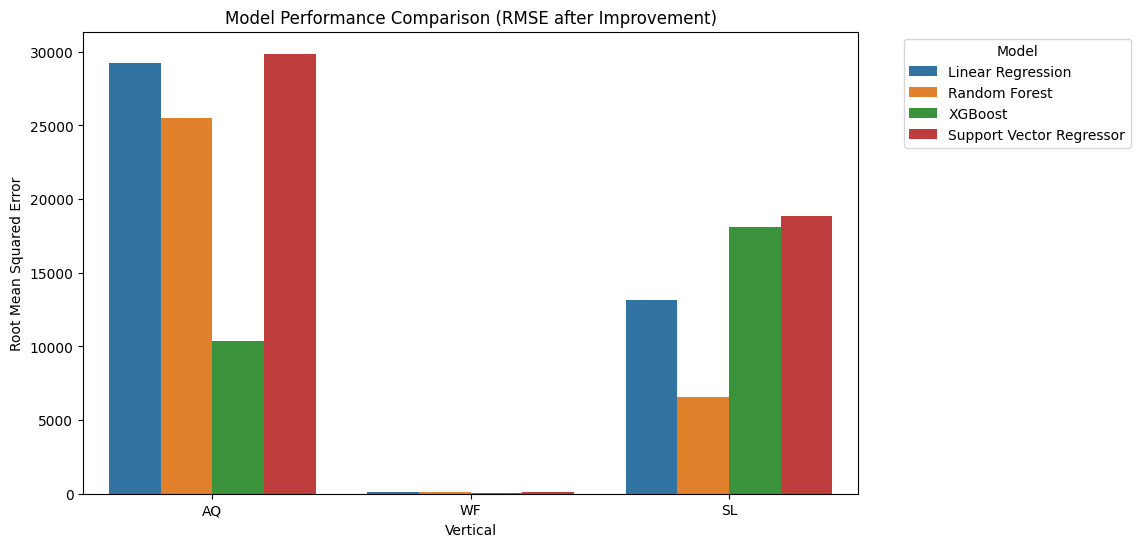

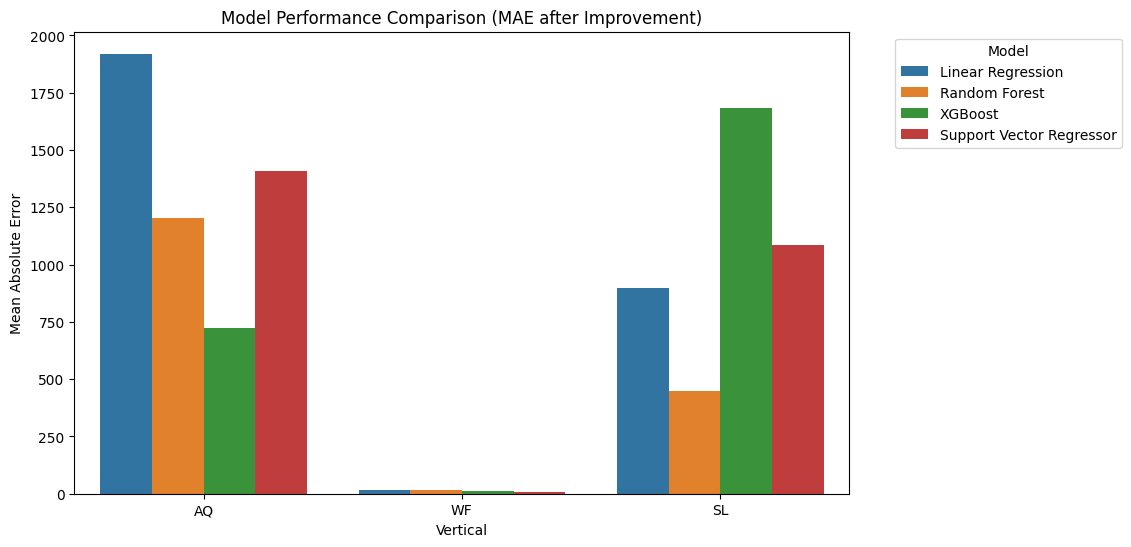

In [ ]:
#importing the libraries required
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "Support Vector Regressor": SVR()
}

# Target value columns
target_value = {
    "AQ": "calibrated_pm25",
    "WF": "flowrate",
    "SL": "active_power"
}


#Adding synthetic data 
def augment_data(df, noise_level=0.05):
    df_aug = df.copy()
    numeric_cols = df_aug.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        noise = np.random.normal(0, noise_level, df_aug[col].shape)
        df_aug[col] = df_aug[col] * (1 + noise)
    return pd.concat([df, df_aug], ignore_index=True)

data_aq_aug = augment_data(data_aq)
data_wf_aug = augment_data(data_wf)
data_sl_aug = augment_data(data_sl)

datasets = {
    "AQ": data_aq_aug,
    "WF": data_wf_aug,
    "SL": data_sl_aug
}
#Training and Evaluation of Models (with tuning)

results_before = {}
results_after = {}

for v, df in datasets.items():
    print(f"\n{'='*70}")
    print(f"Training Improved Models for {v} Vertical")
    print(f"{'='*70}")

    target = target_value[v]
    if target not in df.columns:
        print(f"Target column '{target}' not found in {v}. Skipping..")
        continue

    drop_cols = ['node_id', 'type', 'name', 'latitude', 'longitude', 'created_at']
    df = df.drop(columns=[col for col in drop_cols if col in df.columns])
    df = df.fillna(df.mean())

    X = df.drop(columns=[target])
    y = df[target]
    X = X.apply(pd.to_numeric, errors='coerce').fillna(0)
    y = pd.to_numeric(y, errors='coerce').fillna(0)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results_after[v] = {}

    # Hyperparameter tuning for Random Forest and XGBoost
    tuned_models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": GridSearchCV(
            RandomForestRegressor(random_state=42),
            param_grid={"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20]},
            cv=3,
            scoring="r2",
            n_jobs=-1
        ),
        "XGBoost": GridSearchCV(
            XGBRegressor(random_state=42, verbosity=0),
            param_grid={"n_estimators": [50, 100, 200], "learning_rate": [0.05, 0.1, 0.2]},
            cv=3,
            scoring="r2",
            n_jobs=-1
        ),
        "Support Vector Regressor": SVR(kernel="rbf", C=1.0, gamma="scale")
    }

    for name, model in tuned_models.items():
        model.fit(X_train, y_train)
        if isinstance(model, GridSearchCV):
            model = model.best_estimator_

        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        results_after[v][name] = {"R2": round(r2, 4), "RMSE": round(mse, 4), "MAE": round(mae, 4)}

        print(f"{name}: R2={r2:.3f} | RMSE={mse:.3f} | MAE={mae:.3f}")

# Visualization of Performance

# Converting results to DataFrame
perf_data = []
for v in results_after:
    for model, scores in results_after[v].items():
        perf_data.append([v, model, scores['R2'], scores['RMSE'], scores['MAE']])
        
perf_df = pd.DataFrame(perf_data, columns=['Vertical', 'Model', 'R2 Score', 'RMSE', 'MAE'])

# Plot R2 Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Vertical", y="R2 Score", hue="Model", data=perf_df)
plt.title("Model Performance Comparison (R² Score after Improvement)")
plt.ylabel("R² Score")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot RMSE Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Vertical", y="RMSE", hue="Model", data=perf_df)
plt.title("Model Performance Comparison (RMSE after Improvement)")
plt.ylabel("Root Mean Squared Error")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot MAE Scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Vertical", y="MAE", hue="Model", data=perf_df)
plt.title("Model Performance Comparison (MAE after Improvement)")
plt.ylabel("Mean Absolute Error")
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()